In [ ]:
#Question 1

In [3]:
from itertools import combinations
from collections import defaultdict

def load_transactions(filename):
    """Load transactions from a file."""
    transactions = []
    with open(filename, 'r') as file:
        for line in file:
            transactions.append(set(line.strip().split()))
    return transactions

def get_frequent_itemsets(transactions, min_support):
    """Generate frequent itemsets using the Apriori algorithm."""
    total_transactions = len(transactions)
    min_support_count = (min_support / 100) * total_transactions
    
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1
    
    frequent_itemsets = {itemset: count for itemset, count in item_counts.items() if count >= min_support_count}
    
    k = 2
    current_itemsets = set(frequent_itemsets.keys())
    while current_itemsets:
        candidate_itemsets = set()
        counts = defaultdict(int)
        
        for transaction in transactions:
            for itemset in combinations(transaction, k):
                itemset = frozenset(itemset)
                if all(frozenset(subset) in current_itemsets for subset in combinations(itemset, k-1)):
                    counts[itemset] += 1
        
        current_itemsets = {itemset for itemset, c in counts.items() if c >= min_support_count}
        frequent_itemsets.update({itemset: c for itemset, c in counts.items() if c >= min_support_count})
        k += 1
    
    return frequent_itemsets

def main():
    filename = input("Enter the filename: ").strip()
    min_support = float(input("Enter the minimum support percentage: ").strip())
    
    transactions = load_transactions(filename)
    frequent_itemsets = get_frequent_itemsets(transactions, min_support)
    
    print("Frequent Itemsets:")
    for itemset, count in sorted(frequent_itemsets.items(), key=lambda x: (-len(x[0]), -x[1])):
        print(f"{set(itemset)}: {count}")

if __name__ == "__main__":
    main()


Enter the filename:  transactions.txt
Enter the minimum support percentage:  10


Frequent Itemsets:
{'4', '1', '3', '5', '2'}: 2
{'4', '1', '5', '6', '2'}: 2
{'4', '2', '1', '3'}: 5
{'1', '5', '2', '3'}: 4
{'4', '1', '5', '6'}: 3
{'4', '2', '1', '6'}: 3
{'5', '4', '2', '1'}: 3
{'5', '4', '2', '3'}: 2
{'5', '4', '3', '1'}: 2
{'2', '1', '3', '6'}: 2
{'4', '2', '3', '6'}: 2
{'4', '2', '5', '6'}: 2
{'5', '2', '1', '6'}: 2
{'4', '3', '5', '6'}: 2
{'4', '2', '3'}: 8
{'2', '1', '3'}: 8
{'4', '2', '1'}: 7
{'4', '1', '3'}: 5
{'4', '1', '5'}: 5
{'5', '2', '1'}: 5
{'4', '3', '5'}: 5
{'4', '1', '6'}: 4
{'4', '6', '5'}: 4
{'2', '3', '6'}: 4
{'4', '2', '6'}: 4
{'2', '1', '6'}: 4
{'5', '2', '3'}: 4
{'5', '3', '1'}: 4
{'1', '5', '6'}: 3
{'4', '2', '5'}: 3
{'4', '3', '6'}: 3
{'1', '3', '6'}: 2
{'2', '5', '6'}: 2
{'3', '5', '6'}: 2
{'2', '3'}: 12
{'4', '3'}: 11
{'4', '2'}: 10
{'2', '1'}: 10
{'4', '1'}: 9
{'4', '5'}: 9
{'1', '3'}: 8
{'1', '5'}: 7
{'3', '5'}: 7
{'4', '6'}: 6
{'2', '6'}: 6
{'1', '6'}: 5
{'3', '6'}: 5
{'2', '5'}: 5
{'6', '5'}: 4
{'4'}: 16
{'3'}: 15
{'2'}: 14
{'1'}: 12
{

In [5]:
from itertools import combinations
from collections import defaultdict

def load_transactions(filename):
    """Load transactions from a file."""
    transactions = []
    with open(filename, 'r') as file:
        for line in file:
            transactions.append(set(map(int, line.strip().split())))
    return transactions

def get_frequent_itemsets(transactions, min_support):
    """Generate frequent itemsets using the Apriori algorithm."""
    total_transactions = len(transactions)
    min_support_count = (min_support / 100) * total_transactions
    
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1
    
    frequent_itemsets = {itemset: count for itemset, count in item_counts.items() if count >= min_support_count}
    
    k = 2
    current_itemsets = set(frequent_itemsets.keys())
    while current_itemsets:
        counts = defaultdict(int)
        
        for transaction in transactions:
            for itemset in combinations(transaction, k):
                itemset = frozenset(itemset)
                if all(frozenset(subset) in current_itemsets for subset in combinations(itemset, k-1)):
                    counts[itemset] += 1
        
        current_itemsets = {itemset for itemset, c in counts.items() if c >= min_support_count}
        frequent_itemsets.update({itemset: c for itemset, c in counts.items() if c >= min_support_count})
        k += 1
    
    return frequent_itemsets

def main():
    filename = input("Enter the filename: ").strip()
    min_support = float(input("Enter the minimum support percentage: ").strip())
    
    transactions = load_transactions(filename)
    frequent_itemsets = get_frequent_itemsets(transactions, min_support)
    
    print("\nFrequent Itemsets:")
    for itemset, count in sorted(frequent_itemsets.items(), key=lambda x: (-len(x[0]), -x[1])):
        print(f"{sorted(itemset)} -> {count}")

if __name__ == "__main__":
    main()


Enter the filename:  transactions.txt
Enter the minimum support percentage:  10



Frequent Itemsets:
[1, 2, 3, 4, 5] -> 2
[1, 2, 4, 5, 6] -> 2
[1, 2, 3, 4] -> 5
[1, 2, 3, 5] -> 4
[1, 4, 5, 6] -> 3
[1, 2, 4, 6] -> 3
[1, 2, 4, 5] -> 3
[1, 3, 4, 5] -> 2
[2, 3, 4, 5] -> 2
[1, 2, 3, 6] -> 2
[2, 3, 4, 6] -> 2
[1, 2, 5, 6] -> 2
[2, 4, 5, 6] -> 2
[3, 4, 5, 6] -> 2
[1, 2, 3] -> 8
[2, 3, 4] -> 8
[1, 2, 4] -> 7
[1, 3, 4] -> 5
[1, 4, 5] -> 5
[1, 2, 5] -> 5
[3, 4, 5] -> 5
[1, 4, 6] -> 4
[4, 5, 6] -> 4
[2, 3, 6] -> 4
[1, 2, 6] -> 4
[2, 4, 6] -> 4
[1, 3, 5] -> 4
[2, 3, 5] -> 4
[1, 5, 6] -> 3
[2, 4, 5] -> 3
[3, 4, 6] -> 3
[1, 3, 6] -> 2
[2, 5, 6] -> 2
[3, 5, 6] -> 2
[2, 3] -> 12
[3, 4] -> 11
[1, 2] -> 10
[2, 4] -> 10
[1, 4] -> 9
[4, 5] -> 9
[1, 3] -> 8
[1, 5] -> 7
[3, 5] -> 7
[4, 6] -> 6
[2, 6] -> 6
[1, 6] -> 5
[3, 6] -> 5
[2, 5] -> 5
[5, 6] -> 4
[4] -> 16
[3] -> 15
[2] -> 14
[1] -> 12
[5] -> 11
[6] -> 8


In [7]:
from itertools import combinations
from collections import defaultdict

def load_transactions(filename):
    """Load transactions from a file."""
    transactions = []
    with open(filename, 'r') as file:
        for line in file:
            transactions.append(set(map(int, line.strip().split())))
    return transactions

def get_frequent_itemsets(transactions, min_support):
    """Generate frequent itemsets using the Apriori algorithm."""
    total_transactions = len(transactions)
    min_support_count = (min_support / 100) * total_transactions
    
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1
    
    frequent_itemsets = {itemset: count for itemset, count in item_counts.items() if count >= min_support_count}
    
    k = 2
    current_itemsets = set(frequent_itemsets.keys())
    while current_itemsets:
        counts = defaultdict(int)
        
        for transaction in transactions:
            for itemset in combinations(transaction, k):
                itemset = frozenset(itemset)
                if all(frozenset(subset) in current_itemsets for subset in combinations(itemset, k-1)):
                    counts[itemset] += 1
        
        current_itemsets = {itemset for itemset, c in counts.items() if c >= min_support_count}
        frequent_itemsets.update({itemset: c for itemset, c in counts.items() if c >= min_support_count})
        k += 1
    
    return frequent_itemsets

def main():
    filename = input("Enter the filename: ").strip()
    min_support = float(input("Enter the minimum support percentage: ").strip())
    
    transactions = load_transactions(filename)
    frequent_itemsets = get_frequent_itemsets(transactions, min_support)
    
    print("\nFrequent Itemsets:")
    for itemset, count in sorted(frequent_itemsets.items(), key=lambda x: (-len(x[0]), -x[1])):
        print(f"{sorted(itemset)} -> {count}")

if __name__ == "__main__":
    main()


Enter the filename:  transactions.txt
Enter the minimum support percentage:  20



Frequent Itemsets:
[1, 2, 3, 4] -> 5
[1, 2, 3, 5] -> 4
[1, 2, 3] -> 8
[2, 3, 4] -> 8
[1, 2, 4] -> 7
[1, 3, 4] -> 5
[1, 4, 5] -> 5
[1, 2, 5] -> 5
[3, 4, 5] -> 5
[1, 4, 6] -> 4
[4, 5, 6] -> 4
[2, 3, 6] -> 4
[1, 2, 6] -> 4
[2, 4, 6] -> 4
[1, 3, 5] -> 4
[2, 3, 5] -> 4
[2, 3] -> 12
[3, 4] -> 11
[1, 2] -> 10
[2, 4] -> 10
[1, 4] -> 9
[4, 5] -> 9
[1, 3] -> 8
[1, 5] -> 7
[3, 5] -> 7
[4, 6] -> 6
[2, 6] -> 6
[1, 6] -> 5
[3, 6] -> 5
[2, 5] -> 5
[5, 6] -> 4
[4] -> 16
[3] -> 15
[2] -> 14
[1] -> 12
[5] -> 11
[6] -> 8


In [9]:
from itertools import combinations
from collections import defaultdict

def load_transactions(filename):
    """Load transactions from a file."""
    transactions = []
    with open(filename, 'r') as file:
        for line in file:
            transactions.append(set(map(int, line.strip().split())))
    return transactions

def get_frequent_itemsets(transactions, min_support):
    """Generate frequent itemsets using the Apriori algorithm."""
    total_transactions = len(transactions)
    min_support_count = (min_support / 100) * total_transactions
    
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1
    
    frequent_itemsets = {itemset: count for itemset, count in item_counts.items() if count >= min_support_count}
    
    k = 2
    current_itemsets = set(frequent_itemsets.keys())
    while current_itemsets:
        counts = defaultdict(int)
        
        for transaction in transactions:
            for itemset in combinations(transaction, k):
                itemset = frozenset(itemset)
                if all(frozenset(subset) in current_itemsets for subset in combinations(itemset, k-1)):
                    counts[itemset] += 1
        
        current_itemsets = {itemset for itemset, c in counts.items() if c >= min_support_count}
        frequent_itemsets.update({itemset: c for itemset, c in counts.items() if c >= min_support_count})
        k += 1
    
    return frequent_itemsets

def main():
    filename = input("Enter the filename: ").strip()
    min_support = float(input("Enter the minimum support percentage: ").strip())
    
    transactions = load_transactions(filename)
    frequent_itemsets = get_frequent_itemsets(transactions, min_support)
    
    print("\nFrequent Itemsets:")
    for itemset, count in sorted(frequent_itemsets.items(), key=lambda x: (-len(x[0]), -x[1])):
        print(f"{sorted(itemset)} -> {count}")

if __name__ == "__main__":
    main()


Enter the filename:  transactions.txt
Enter the minimum support percentage:  30



Frequent Itemsets:
[1, 2, 3] -> 8
[2, 3, 4] -> 8
[1, 2, 4] -> 7
[2, 3] -> 12
[3, 4] -> 11
[1, 2] -> 10
[2, 4] -> 10
[1, 4] -> 9
[4, 5] -> 9
[1, 3] -> 8
[1, 5] -> 7
[3, 5] -> 7
[4, 6] -> 6
[2, 6] -> 6
[4] -> 16
[3] -> 15
[2] -> 14
[1] -> 12
[5] -> 11
[6] -> 8


In [11]:
from itertools import combinations
from collections import defaultdict

def load_transactions(filename):
    """Load transactions from a file."""
    transactions = []
    with open(filename, 'r') as file:
        for line in file:
            transactions.append(set(map(int, line.strip().split())))
    return transactions

def get_frequent_itemsets(transactions, min_support):
    """Generate frequent itemsets using the Apriori algorithm."""
    total_transactions = len(transactions)
    min_support_count = (min_support / 100) * total_transactions
    
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1
    
    frequent_itemsets = {itemset: count for itemset, count in item_counts.items() if count >= min_support_count}
    
    k = 2
    current_itemsets = set(frequent_itemsets.keys())
    while current_itemsets:
        counts = defaultdict(int)
        
        for transaction in transactions:
            for itemset in combinations(transaction, k):
                itemset = frozenset(itemset)
                if all(frozenset(subset) in current_itemsets for subset in combinations(itemset, k-1)):
                    counts[itemset] += 1
        
        current_itemsets = {itemset for itemset, c in counts.items() if c >= min_support_count}
        frequent_itemsets.update({itemset: c for itemset, c in counts.items() if c >= min_support_count})
        k += 1
    
    return frequent_itemsets

def main():
    filename = input("Enter the filename: ").strip()
    min_support = float(input("Enter the minimum support percentage: ").strip())
    
    transactions = load_transactions(filename)
    frequent_itemsets = get_frequent_itemsets(transactions, min_support)
    
    print("\nFrequent Itemsets:")
    for itemset, count in sorted(frequent_itemsets.items(), key=lambda x: (-len(x[0]), -x[1])):
        print(f"{sorted(itemset)} -> {count}")

if __name__ == "__main__":
    main()


Enter the filename:  transactions.txt
Enter the minimum support percentage:  50



Frequent Itemsets:
[2, 3] -> 12
[3, 4] -> 11
[1, 2] -> 10
[2, 4] -> 10
[4] -> 16
[3] -> 15
[2] -> 14
[1] -> 12
[5] -> 11


In [ ]:
##Pseudo Code, ran in latex

In [ ]:
\documentclass{article}
\usepackage{algorithm}
\usepackage{algpseudocode}

\begin{document}

\begin{algorithm}
\caption{Apriori Algorithm}
\begin{algorithmic}[1]
\Procedure{AprioriAlgorithm}{filename, min\_support}
    \State transactions $\gets$ LOAD\_TRANSACTIONS(filename)
    \State total\_transactions $\gets$ LENGTH(transactions)
    \State min\_support\_count $\gets$ (min\_support / 100) * total\_transactions

    \State item\_counts $\gets$ EMPTY DICTIONARY
    \For{each transaction in transactions}
        \For{each item in transaction}
            \State item\_counts[$\{item\}$] $\gets$ item\_counts[$\{item\}$] + 1
        \EndFor
    \EndFor

    \State frequent\_itemsets $\gets$ FILTER item\_counts WHERE count $\geq$ min\_support\_count

    \State $k \gets 2$
    \State current\_itemsets $\gets$ SET of frequent\_itemsets
    \While{current\_itemsets is not empty}
        \State candidate\_itemsets $\gets$ EMPTY SET
        \State counts $\gets$ EMPTY DICTIONARY

        \For{each transaction in transactions}
            \For{each k-itemset combination in transaction}
                \If{all (k-1)-subsets are in current\_itemsets}
                    \State counts[k-itemset] $\gets$ counts[k-itemset] + 1
                \EndIf
            \EndFor
        \EndFor

        \State current\_itemsets $\gets$ FILTER counts WHERE count $\geq$ min\_support\_count
        \State UPDATE frequent\_itemsets WITH current\_itemsets
        \State $k \gets k + 1$
    \EndWhile

    \State \Return frequent\_itemsets
\EndProcedure
\end{algorithmic}
\end{algorithm}

\end{document}


In [ ]:
#Question 2

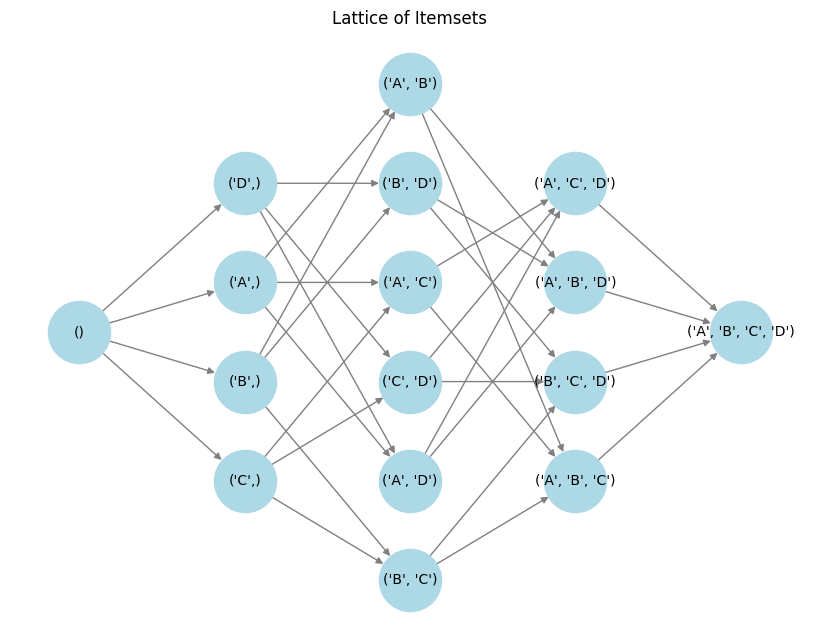

In [27]:
from itertools import chain, combinations
import networkx as nx
import matplotlib.pyplot as plt

def generate_lattice(items):
    """Generate all possible itemsets in a lattice."""
    itemsets = list(chain.from_iterable(combinations(items, r) for r in range(len(items) + 1)))
    return itemsets

def draw_lattice(itemsets):
    """Draw the lattice of itemsets."""
    G = nx.DiGraph()
    
    # Add nodes
    for itemset in itemsets:
        G.add_node(itemset, level=len(itemset))
    
    # Add edges (subset relationships)
    for i in range(len(itemsets)):
        for j in range(i + 1, len(itemsets)):
            if set(itemsets[i]).issubset(set(itemsets[j])) and len(itemsets[j]) - len(itemsets[i]) == 1:
                G.add_edge(itemsets[i], itemsets[j])
    
    # Compute positions based on levels
    pos = nx.multipartite_layout(G, subset_key="level")
    
    # Draw the lattice
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, edge_color="gray")
    plt.title("Lattice of Itemsets")
    plt.show()

# Define items
items = ["A", "B", "C", "D"]

# Generate all possible itemsets
itemsets = generate_lattice(items)

# Draw the lattice
draw_lattice(itemsets)


In [ ]:
#Question 3

In [23]:
from itertools import combinations
from collections import defaultdict

def load_transactions():
    """Manually define transactions based on the problem statement."""
    return [
        {"A", "B", "E"},
        {"B", "D"},
        {"A", "B", "E"},
        {"A", "C"},
        {"B", "C"},
        {"A", "C"},
        {"A", "B"},
        {"A", "B", "C", "E"},
        {"A", "B", "C"},
        {"A", "C", "E"},
    ]

def get_frequent_itemsets(transactions, min_support):
    """Generate frequent itemsets using the Apriori algorithm."""
    total_transactions = len(transactions)
    min_support_count = min_support
    
    item_counts = defaultdict(int)
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1
    
    frequent_itemsets = {itemset: count for itemset, count in item_counts.items() if count >= min_support_count}
    
    k = 2
    current_itemsets = set(frequent_itemsets.keys())
    while current_itemsets:
        counts = defaultdict(int)
        
        for transaction in transactions:
            for itemset in combinations(transaction, k):
                itemset = frozenset(itemset)
                if all(frozenset(subset) in current_itemsets for subset in combinations(itemset, k-1)):
                    counts[itemset] += 1
        
        current_itemsets = {itemset for itemset, c in counts.items() if c >= min_support_count}
        frequent_itemsets.update({itemset: c for itemset, c in counts.items() if c >= min_support_count})
        k += 1
    
    return frequent_itemsets

def main():
    min_support = 7  # Given minimum support threshold
    transactions = load_transactions()
    frequent_itemsets = get_frequent_itemsets(transactions, min_support)
    
    print("Frequent Itemsets:")
    for itemset, count in sorted(frequent_itemsets.items(), key=lambda x: (-len(x[0]), -x[1])):
        print(f"{set(itemset)}: {count}")

if __name__ == "__main__":
    main()


Frequent Itemsets:
{'A'}: 8
{'B'}: 7


In [ ]:
#Question 4 a)

Frequent Itemsets (min support = 7):
set(): 10
{'A'}: 8
{'B'}: 7


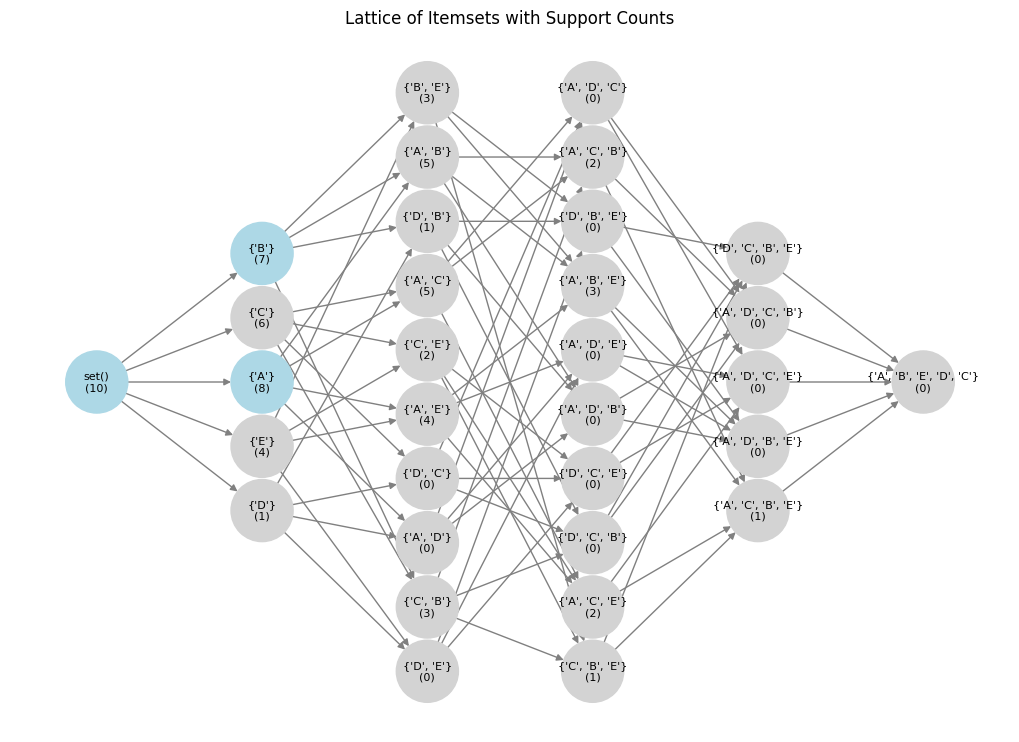

In [31]:
from itertools import chain, combinations
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def generate_lattice(items, transactions):
    """Generate all possible itemsets in a lattice with support counts."""
    itemsets = list(chain.from_iterable(combinations(items, r) for r in range(len(items) + 1)))
    
    # Compute support counts
    support_counts = defaultdict(int)
    for itemset in itemsets:
        for transaction in transactions:
            if set(itemset).issubset(transaction):
                support_counts[itemset] += 1
    
    return itemsets, support_counts

def find_frequent_itemsets(support_counts, min_support):
    """Filter itemsets that meet the minimum support threshold."""
    return {itemset: count for itemset, count in support_counts.items() if count >= min_support}

def draw_lattice(itemsets, support_counts, frequent_itemsets):
    """Draw the lattice of itemsets with their support counts, highlighting frequent itemsets."""
    G = nx.DiGraph()
    
    # Add nodes with support count labels
    for itemset in itemsets:
        label = f"{set(itemset)}\n({support_counts[itemset]})"
        color = "lightblue" if itemset in frequent_itemsets else "lightgray"
        G.add_node(itemset, level=len(itemset), label=label, color=color)
    
    # Add edges (subset relationships)
    for i in range(len(itemsets)):
        for j in range(i + 1, len(itemsets)):
            if set(itemsets[i]).issubset(set(itemsets[j])) and len(itemsets[j]) - len(itemsets[i]) == 1:
                G.add_edge(itemsets[i], itemsets[j])
    
    # Compute positions based on levels
    pos = nx.multipartite_layout(G, subset_key="level")
    labels = nx.get_node_attributes(G, 'label')
    colors = [G.nodes[node]['color'] for node in G.nodes()]
    
    # Draw the lattice
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color=colors, font_size=8, edge_color="gray")
    plt.title("Lattice of Itemsets with Support Counts")
    plt.show()

# Define items
items = ["A", "B", "C", "D", "E"]

# Define transactions
transactions = [
    {"A", "B", "E"},
    {"B", "D"},
    {"A", "B", "E"},
    {"A", "C"},
    {"B", "C"},
    {"A", "C"},
    {"A", "B"},
    {"A", "B", "C", "E"},
    {"A", "B", "C"},
    {"A", "C", "E"},
]

# Generate all possible itemsets with support counts
itemsets, support_counts = generate_lattice(items, transactions)

# Find frequent itemsets with minimum support of 7
min_support = 7
frequent_itemsets = find_frequent_itemsets(support_counts, min_support)

# Print frequent itemsets
print("Frequent Itemsets (min support = 7):")
for itemset, count in frequent_itemsets.items():
    print(f"{set(itemset)}: {count}")

# Draw the lattice
draw_lattice(itemsets, support_counts, frequent_itemsets)


In [ ]:
#Question 4 b)

Frequent Itemsets (min support = 5):
set(): 10
{'A'}: 8
{'B'}: 7
{'C'}: 6
{'A', 'B'}: 5
{'A', 'C'}: 5

Closed Frequent Itemsets:
{'A', 'B'}: 5
{'B'}: 7
{'A', 'C'}: 5
{'C'}: 6
{'A'}: 8
set(): 10

Maximal Frequent Itemsets:
{'A', 'B'}: 5
{'A', 'C'}: 5


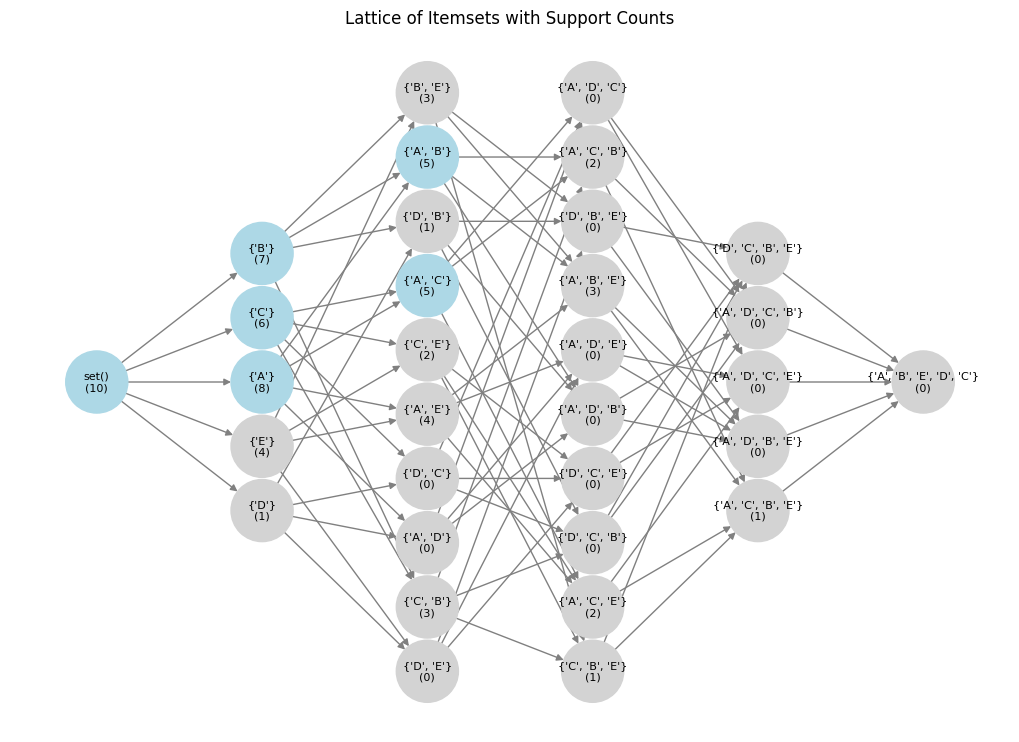

In [33]:
from itertools import chain, combinations
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def generate_lattice(items, transactions):
    """Generate all possible itemsets in a lattice with support counts."""
    itemsets = list(chain.from_iterable(combinations(items, r) for r in range(len(items) + 1)))
    
    # Compute support counts
    support_counts = defaultdict(int)
    for itemset in itemsets:
        for transaction in transactions:
            if set(itemset).issubset(transaction):
                support_counts[itemset] += 1
    
    return itemsets, support_counts

def find_frequent_itemsets(support_counts, min_support):
    """Filter itemsets that meet the minimum support threshold."""
    return {itemset: count for itemset, count in support_counts.items() if count >= min_support}

def find_closed_and_maximal_frequent(frequent_itemsets):
    """Identify closed and maximal frequent itemsets."""
    closed_itemsets = set()
    maximal_itemsets = set()
    
    for itemset, count in frequent_itemsets.items():
        is_closed = True
        is_maximal = True
        for superset in frequent_itemsets:
            if set(itemset) < set(superset):
                if frequent_itemsets[superset] == count:
                    is_closed = False
                is_maximal = False
        if is_closed:
            closed_itemsets.add((itemset, count))
        if is_maximal:
            maximal_itemsets.add((itemset, count))
    
    return closed_itemsets, maximal_itemsets

def draw_lattice(itemsets, support_counts, frequent_itemsets):
    """Draw the lattice of itemsets with their support counts, highlighting frequent itemsets."""
    G = nx.DiGraph()
    
    # Add nodes with support count labels
    for itemset in itemsets:
        label = f"{set(itemset)}\n({support_counts[itemset]})"
        color = "lightblue" if itemset in frequent_itemsets else "lightgray"
        G.add_node(itemset, level=len(itemset), label=label, color=color)
    
    # Add edges (subset relationships)
    for i in range(len(itemsets)):
        for j in range(i + 1, len(itemsets)):
            if set(itemsets[i]).issubset(set(itemsets[j])) and len(itemsets[j]) - len(itemsets[i]) == 1:
                G.add_edge(itemsets[i], itemsets[j])
    
    # Compute positions based on levels
    pos = nx.multipartite_layout(G, subset_key="level")
    labels = nx.get_node_attributes(G, 'label')
    colors = [G.nodes[node]['color'] for node in G.nodes()]
    
    # Draw the lattice
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color=colors, font_size=8, edge_color="gray")
    plt.title("Lattice of Itemsets with Support Counts")
    plt.show()

# Define items
items = ["A", "B", "C", "D", "E"]

# Define transactions
transactions = [
    {"A", "B", "E"},
    {"B", "D"},
    {"A", "B", "E"},
    {"A", "C"},
    {"B", "C"},
    {"A", "C"},
    {"A", "B"},
    {"A", "B", "C", "E"},
    {"A", "B", "C"},
    {"A", "C", "E"},
]

# Generate all possible itemsets with support counts
itemsets, support_counts = generate_lattice(items, transactions)

# Find frequent itemsets with minimum support of 5
min_support = 5
frequent_itemsets = find_frequent_itemsets(support_counts, min_support)

# Find closed and maximal frequent itemsets
closed_itemsets, maximal_itemsets = find_closed_and_maximal_frequent(frequent_itemsets)

# Print frequent itemsets
print("Frequent Itemsets (min support = 5):")
for itemset, count in frequent_itemsets.items():
    print(f"{set(itemset)}: {count}")

# Print closed frequent itemsets
print("\nClosed Frequent Itemsets:")
for itemset, count in closed_itemsets:
    print(f"{set(itemset)}: {count}")

# Print maximal frequent itemsets
print("\nMaximal Frequent Itemsets:")
for itemset, count in maximal_itemsets:
    print(f"{set(itemset)}: {count}")

# Draw the lattice
draw_lattice(itemsets, support_counts, frequent_itemsets)
